In [1]:
import sys
import os
import gdal
import numpy as np
import pylab as pl
import skimage
from matplotlib.colors import ListedColormap
from importlib import reload

sys.path.insert(0, '../src')
from datasetGen import rasterizer
import utils.geofunctions as gf

reload(rasterizer)
reload(gf)

%matplotlib inline

In [2]:
DATA_DIR = "../data_real"
#raster_file = os.path.join(DATA_DIR, "Landsat8_225-64_17-07-2016-R6G5B4.tif")
raster_file = os.path.join(DATA_DIR, "Landsat8_225-64_17-07-2016-B1-7.tif")
vector_shp = os.path.join(DATA_DIR, "PRODES2016_225-64_REP.shp")
class_column = "agregClass"

In [3]:
#raster_img = gf.load_image(raster_file) #TODO - Review this method (issue #5)
raster_ds = gdal.Open(raster_file)
raster_img = raster_ds.ReadAsArray()
raster_img = np.rollaxis(raster_img, 0, start=3)
print(raster_img.shape)

(7741, 7591, 7)


(-0.5, 7590.5, 7740.5, -0.5)

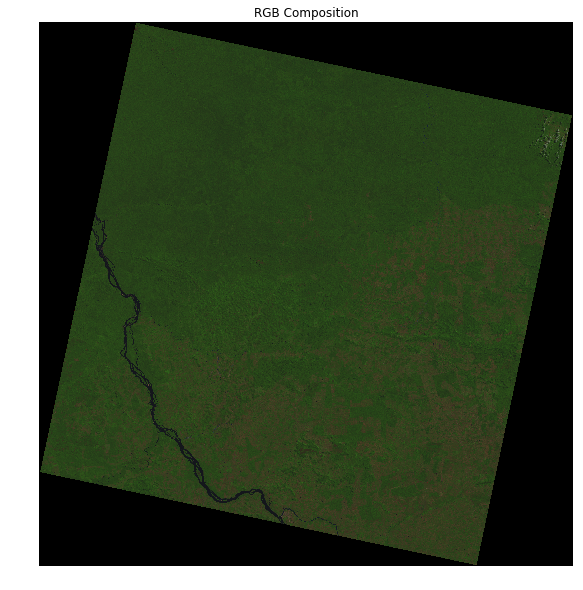

In [8]:
pl.figure(figsize=(10,10))
pl.title('RGB Composition')
raster_img = skimage.img_as_float(raster_img).astype(np.float32)
pl.imshow(raster_img[:,:,[5, 4, 3]])
pl.axis('off')

In [25]:
rstr = rasterizer.Rasterizer(vector_shp, raster_file, class_column)
rstr.collect_class_names()
rstr.rasterize_layer()
class_names = rstr.get_class_names()
rasterized_labels = rstr.get_labeled_raster()

--- Collecting Labels ---
Labels loaded:
	" DESMATAMENTO "
	" FLORESTA "
	" HIDROGRAFIA "
	" NAO_FLORESTA "


Raster Shape: (7741, 7591)


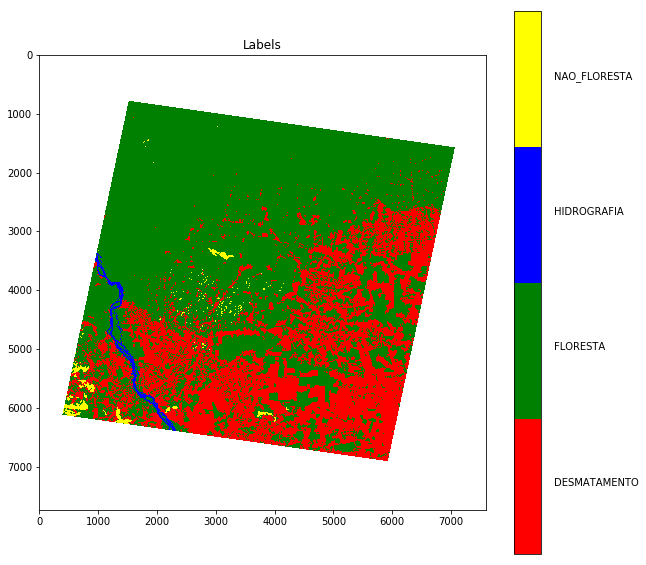

In [26]:
pl.figure(figsize=(10, 10))
pl.title('Labels')
print("Raster Shape:", rasterized_labels.shape)
labels = np.ma.masked_where(rasterized_labels == 255, rasterized_labels)

colorMap = ListedColormap(["red", "green", "blue", "yellow"])
pl.imshow(rasterized_labels, cmap=colorMap)
cbar = pl.colorbar()
cbar.ax.get_yaxis().set_ticks([])

for j, lab in enumerate(class_names):
    cbar.ax.text(1.5, (2 * j + 1) / 8, lab, ha='left')

cbar.ax.get_yaxis().labelpad = 15
#cbar.ax.set_yticklabels(class_names)